# ADAML - Excercise 1

**Author**: Radomir Babek

## TASK 1 - Linear vs. Nonlinear Dimensionality reduction


In [90]:
import re
from pandas import read_csv
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


### Data loading

In [ ]:
def load_dataset(filepath, header=None):
    with open(filepath, 'r') as f:
        lines = f.readlines()

    # Find the line index with @Data (case-insensitive)
    start_idx = None
    for i, line in enumerate(lines):
        if line.strip().lower() == '@data':
            start_idx = i
            break

    if start_idx is None:
        raise ValueError("@Data section not found in file.")

    # Get everything after the @Data line
    csv_lines = lines[start_idx + 1:]

    return read_csv(StringIO(''.join(csv_lines)), names=header, header=None)

header = [
    "season",
    "year",
    "month",
    "hour",
    "holiday",
    "weekday",
    "workingday",
    "weather",
    "temp",
    "feel_temp",
    "humidity",
    "windspeed",
    "casual",
    "registered",
    "count",
] 

dataset = load_dataset("dataset.arff", header)  
display(dataset)

dataset = dataset.drop(columns=["casual", "registered"])
#encoding the string attributes
categorical_cols = ['season', 'weather']
df_encoded = pd.get_dummies(dataset, columns=categorical_cols, drop_first=False)
bool_cols = ['holiday', 'workingday']
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

dataset = df_encoded
display(dataset)


,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,casual,registered,count
0,spring,0,1,0,False,6,False,clear,9.84,14.395,0.81,0.0000,3,13,16
1,spring,0,1,1,False,6,False,clear,9.02,13.635,0.80,0.0000,8,32,40
2,spring,0,1,2,False,6,False,clear,9.02,13.635,0.80,0.0000,5,27,32
3,spring,0,1,3,False,6,False,clear,9.84,14.395,0.75,0.0000,3,10,13
4,spring,0,1,4,False,6,False,clear,9.84,14.395,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1,12,19,False,1,True,misty,10.66,12.880,0.60,11.0014,11,108,119
17375,spring,1,12,20,False,1,True,misty,10.66,12.880,0.60,11.0014,8,81,89
17376,spring,1,12,21,False,1,True,clear,10.66,12.880,0.60,11.0014,7,83,90
17377,spring,1,12,22,False,1,True,clear,10.66,13.635,0.56,8.9981,13,48,61


,year,month,hour,holiday,weekday,workingday,temp,feel_temp,humidity,windspeed,count,season_fall,season_spring,season_summer,season_winter,weather_clear,weather_heavy_rain,weather_misty,weather_rain
0,0,1,0,0,6,0,9.84,14.395,0.81,0.0000,16,False,True,False,False,True,False,False,False
1,0,1,1,0,6,0,9.02,13.635,0.80,0.0000,40,False,True,False,False,True,False,False,False
2,0,1,2,0,6,0,9.02,13.635,0.80,0.0000,32,False,True,False,False,True,False,False,False
3,0,1,3,0,6,0,9.84,14.395,0.75,0.0000,13,False,True,False,False,True,False,False,False
4,0,1,4,0,6,0,9.84,14.395,0.75,0.0000,1,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,1,1,10.66,12.880,0.60,11.0014,119,False,True,False,False,False,False,True,False
17375,1,12,20,0,1,1,10.66,12.880,0.60,11.0014,89,False,True,False,False,False,False,True,False
17376,1,12,21,0,1,1,10.66,12.880,0.60,11.0014,90,False,True,False,False,True,False,False,False
17377,1,12,22,0,1,1,10.66,13.635,0.56,8.9981,61,False,True,False,False,True,False,False,False


Data is loaded as CSV. Columns specifying a class are converted to numerical values using one hot encoding approach. Drop first is not utilized, because PCA generally handless multicolinearity without problems and when analysing the biplots, it would be imposible to derive assumptions based on the dropped attribute.

Because the task is to predict total count of users and the relation between columns count, registered and casual is **count = registered + casual**, we must drop these two columns so the experiment makes sence in the given context.

### Analysis using PCA

PC1: 0.18 of variance (0.18 with previous components)
PC2: 0.12 of variance (0.30 with previous components)
PC3: 0.10 of variance (0.40 with previous components)
PC4: 0.08 of variance (0.48 with previous components)
PC5: 0.07 of variance (0.55 with previous components)
PC6: 0.07 of variance (0.62 with previous components)
PC7: 0.06 of variance (0.68 with previous components)
PC8: 0.05 of variance (0.74 with previous components)
PC9: 0.05 of variance (0.79 with previous components)
PC10: 0.05 of variance (0.84 with previous components)
PC11: 0.05 of variance (0.89 with previous components)
PC12: 0.04 of variance (0.92 with previous components)
PC13: 0.03 of variance (0.95 with previous components)
PC14: 0.02 of variance (0.97 with previous components)
PC15: 0.02 of variance (0.99 with previous components)
PC16: 0.01 of variance (1.00 with previous components)
PC17: 0.00 of variance (1.00 with previous components)
PC18: 0.00 of variance (1.00 with previous components)
PC19: 0.00 of varia

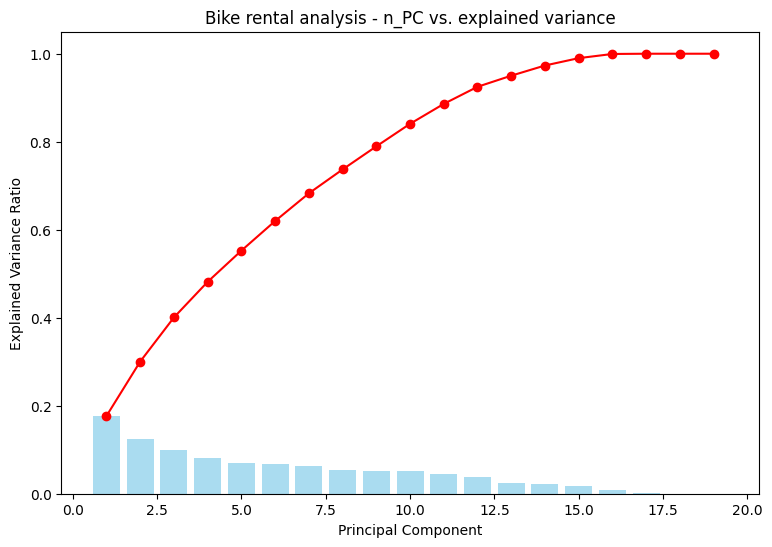

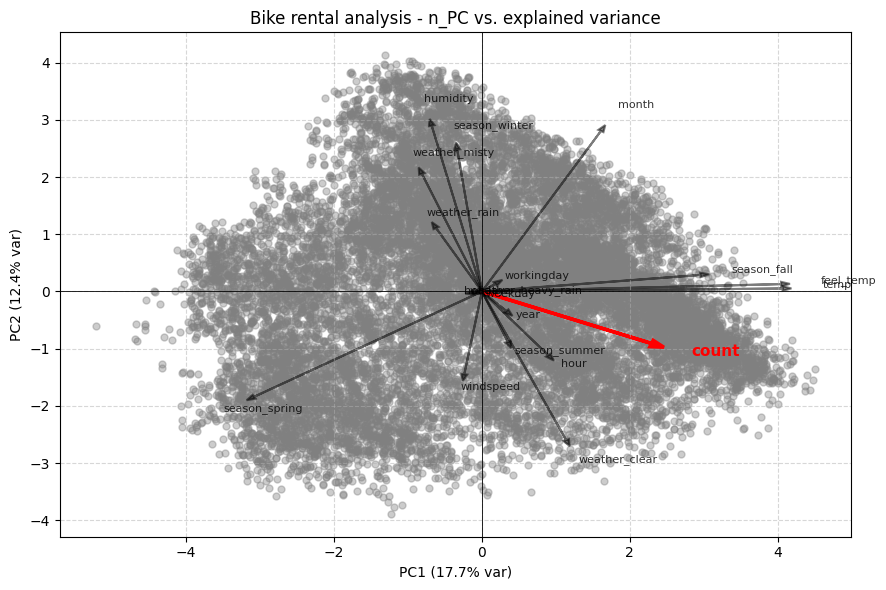

In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def plot_PCA(normalized_data, columns, title):
    # ----------------
    # PC variance plot
    pca = PCA()
    pca.fit_transform(normalized_data)
    explained_variance = pca.explained_variance_ratio_
    
    # Print each component’s contribution
    cum_var = 0
    for i, var in enumerate(explained_variance, start=1):
        cum_var+=var
        print(f"PC{i}: {var:.2f} of variance ({cum_var:.2f} with previous components)")


    plt.figure(figsize=(9, 6))
    plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, color='skyblue')
    plt.plot(range(1, len(explained_variance)+1), np.cumsum(explained_variance), marker='o', color='red')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title(title)
    plt.show()

    # ----------------
    # BIPLOT
    arrow_scale = 4.5
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(normalized_data)

    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    plt.figure(figsize=(9, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.4, s=25, color='gray')
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
    plt.title(title)

    for i, feature in enumerate(columns):
        x, y = loadings[i, 0]*arrow_scale, loadings[i, 1]*arrow_scale
        if feature == "count":
            plt.arrow(0, 0, x, y, color='red', linewidth=2.5, head_width=0.12, length_includes_head=True)
            plt.text(x*1.15, y*1.15, feature, color='red', fontsize=11, fontweight='bold')
        else:
            plt.arrow(0, 0, x, y, color='black', alpha=0.5, linewidth=1.5, head_width=0.08, length_includes_head=True)
            plt.text(x*1.1, y*1.1, feature, color='black', fontsize=8, alpha=0.8)

    plt.axhline(0, color='black', linewidth=0.6)
    plt.axvline(0, color='black', linewidth=0.6)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

sc = StandardScaler()
data_scaled = sc.fit_transform(dataset)
plot_PCA(data_scaled, dataset.columns, "Bike rental analysis - n_PC vs. explained variance")


PCA performed on a Bike rental dataset requires a brief commentary.

Data contains complex relations and is not easily explainable with just two principal components (reaches cca 0.3 of explained variance).

Biplot suggests the relation between the most important principal components. The count of users is for example negatively correlated with a seasons spring and winter and possitively correlated with summer, clear weather and higher number of temperature. the month is non-correlated probably because of rise and decline of users accross the year.

### t-SNE 

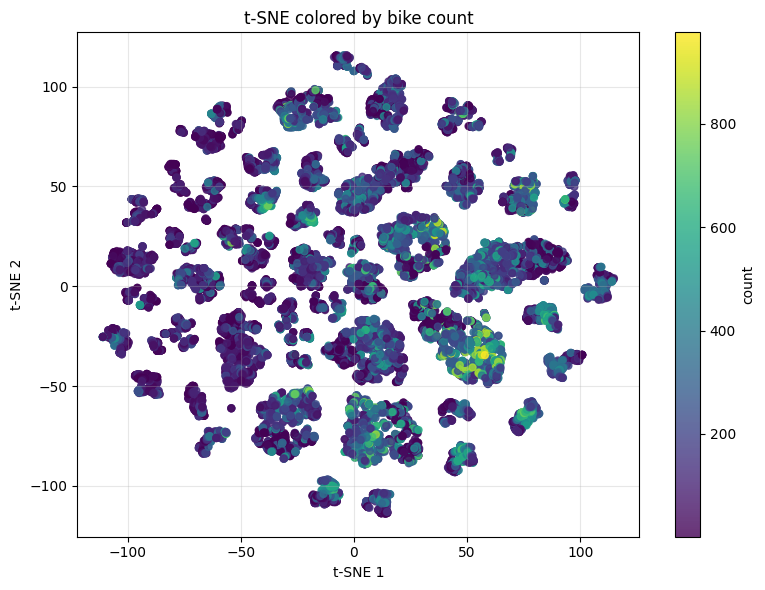

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

X = dataset.drop(columns=["count"])
y = dataset["count"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, init='pca', random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sc = plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,                
    cmap='viridis',
    s=25,
    alpha=0.8
)
plt.colorbar(sc, label='count')
plt.title("t-SNE colored by bike count")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



The visualization of t-SNE with reduction to 2D space shows systematic variation. Groups within clusters change the color gradually and not randomly. Multiple clusters were created, the purpose of each cluster could be evaluated more (e.g. different clusters for each season...)

### Testing the models



The problem with tsne reduction is, that it is not fittable on new data. Regression therefore might not be the best approach to go for but for the testing purposes random forrest is utilized on tsne data.

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# now X_tsne is your 2D representation
from sklearn.model_selection import train_test_split
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(
    X_tsne, y, test_size=0.2, random_state=42
)

y_train_tsne = y_train_tsne.reset_index(drop=True)
y_test_tsne = y_test_tsne.reset_index(drop=True)

# model
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_tsne, y_train_tsne)

y_pred = rf.predict(X_test_tsne)
rmse = np.sqrt(mean_squared_error(y_test_tsne, y_pred))
r2 = r2_score(y_test_tsne, y_pred)
print(f"RMSE={rmse}, R^2={r2}")


RMSE=113.82822792502148, R^2=0.5908196064507376


when testing PCA first the dimensional reduction of the is performed. We reduce the model to 11 PC which explains 89% of datasets variance. Then we try to predict using RandomForest.

In [95]:
from sklearn.model_selection import train_test_split

pca = PCA(n_components=11)

X = dataset.drop(columns=["count"])
y = dataset["count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

# Apply PCA
X_train_pca = pca.fit_transform(X_train_s)
X_test_pca = pca.transform(X_test_s)

y_train_pca = y_train.reset_index(drop=True)
y_test_pca = y_test.reset_index(drop=True)

# model
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_pca, y_train_pca)

y_pred = rf.predict(X_test_pca)
rmse = np.sqrt(mean_squared_error(y_test_pca, y_pred))
r2 = r2_score(y_test_pca, y_pred)
print(f"RMSE={rmse}, R^2={r2}")


RMSE=95.8223177625923, R^2=0.7210250078026266


### Conclusion

With PCA, using two dimentsions very low predicting capabilities were achieved (RMSE=161.51, R^2=0.17). 11 components can provide model with RMSE=99.31 and R^2=0.69.

t-SNE reduction to 2D space on the other hand showed a great result given the significant reduction. But the problem of non-reproducibility of the reduction procedure therefore inability to apply the reduction to new data makes it less versitile than standard PCA.

## TASK 2 - visualization with SOM

           0        1        2        3        4        5        6        7    \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           8        9    ...           774           775           776  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.197414      0.099543      0.046629   
std        0.0      0.0  ...      5.991206      

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: 784, Length: 70000, dtype: int64

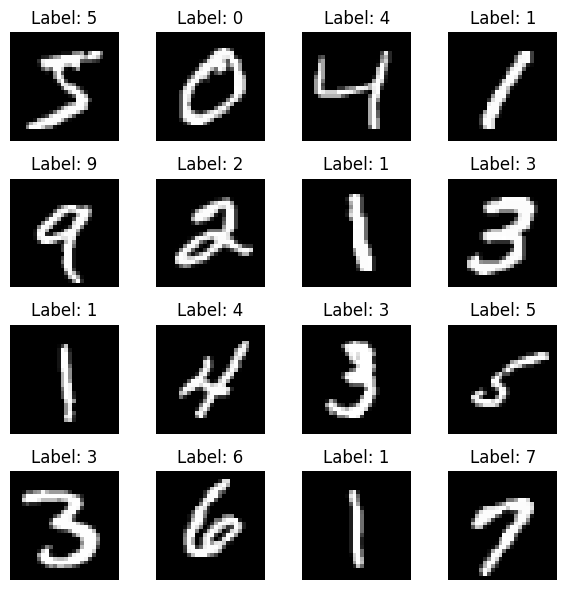

In [132]:
from minisom import MiniSom

dataset = load_dataset("mnist_784.arff", header=None)

X = dataset.iloc[:,:-1]
cls = dataset.iloc[:, -1]

print(X.describe())

display(X)
display(cls)

fig, axes = plt.subplots(4, 4, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {cls[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

X = X.to_numpy(dtype=np.float32)
X /= 255.0


Dataset contains 70000 samples of 24x24 pixel sized images. Pixels contain an intensity value. Intensities range from 0-255.

In [ ]:
from minisom import MiniSom

def train_som(X, num_iter=20000, som_side=5):
    input_len = X.shape[1]
    print(f"Training on data shape: {X.shape}")

    som = MiniSom(x=som_side, y=som_side, input_len=input_len,
                  sigma=0.85, learning_rate=0.1,
                  neighborhood_function='gaussian', random_seed=0)

    som.random_weights_init(X)
    som.train_random(X, num_iter, verbose=True)

    return som

In [ ]:
import matplotlib.cm as cm

def visualize_u(som):
    u_matrix = som.distance_map().T

    plt.figure(figsize=(10, 10))
    plt.pcolor(u_matrix, cmap='gray_r')
    plt.colorbar(label="Average distance to neighbors")

    colors = cm.tab10(np.linspace(0, 1, 10))  # 10 distinct colors

    # Plot samples on their BMUs with color-coded labels
    indices = np.random.choice(len(X), size=3000, replace=False)
    for i in indices:
        w = som.winner(X[i])
        digit = int(cls[i])
        plt.text(w[0] + 0.5, w[1] + 0.5, str(digit),
                color=colors[digit],
                fontsize=8, fontweight='bold',
                ha='center', va='center', alpha=0.9)

    plt.title("SOM Visualization with Digit Labels", fontsize=14)
    plt.axis([0, som.get_weights().shape[0], 0, som.get_weights().shape[1]])
    plt.gca().invert_yaxis()
    plt.show()


Training on data shape: (70000, 784)
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 5.976399479253892


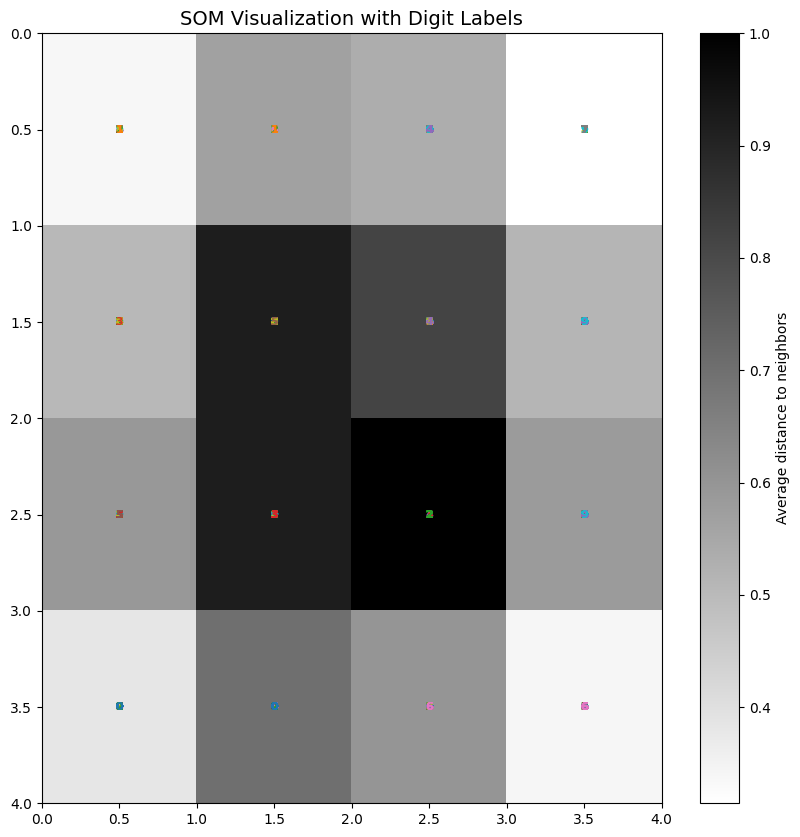

In [139]:
som = train_som(X, num_iter=50000, som_side=4)
visualize_u(som)

First experiment was to create the least possible U-map, where each digit would have just one neuron. We can see, that the clustering is not working properly this way and som_side must be increased.

Training on data shape: (70000, 784)
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 4.695275257724152


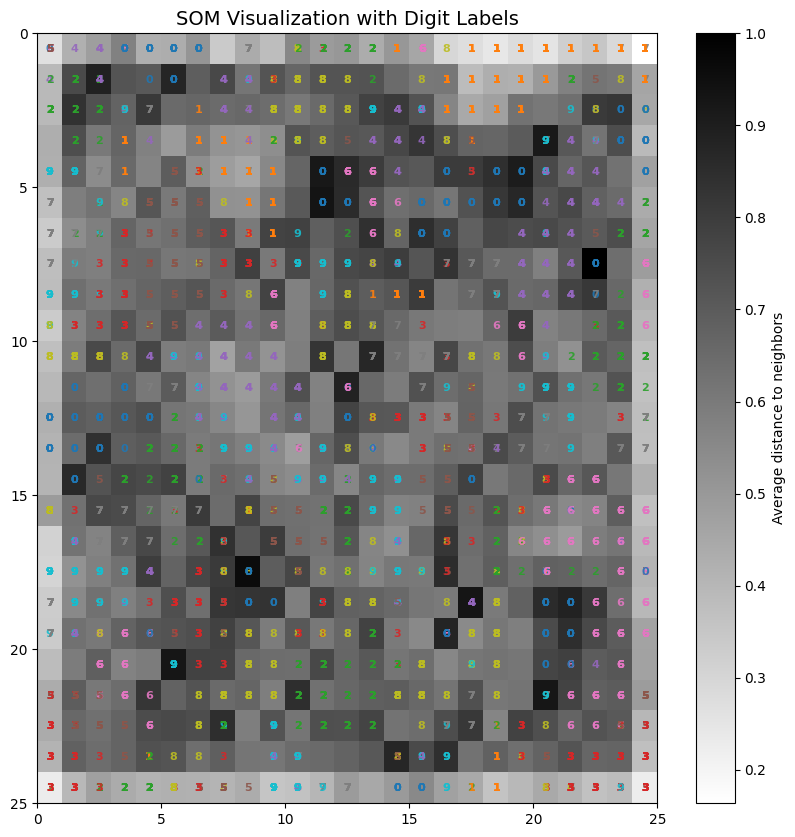

In [140]:
som = train_som(X, num_iter=50000, som_side=25)
visualize_u(som)

After trying different combinations of num_iter, sigma, lr and som_sizes, I achieved a quantization error below 4.7. We can try to comment on the result.

U-matrix shows that data is not linearly separable. Some digits formed clusters, with clear boundaries, that suggests that som training was successful. Some clusters overlap in term of digit labels (mostly 2). This suggests it's hard to differentiate boundaries between some digits.